In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import packages and check versions
import sys
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("numpy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O
print("pandas version: {}". format(pd.__version__))
import scipy as sp
print("scipy version: {}". format(sp.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))
from IPython.display import display, display_markdown # displays dataframe in pretty format


# Input data files are available in the read-only "../input/" directory
# list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Python version: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
numpy version: 1.21.6
pandas version: 1.3.5
scipy version: 1.7.3
matplotlib version: 3.5.3
seaborn version: 0.11.2
scikit-learn version: 1.0.2
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


[\\]: # "I'm a comment, I need an empty line before me and quotes (can use perentheses instead of quotes)
And can be in multiple lines"

# Index

## [The Data Set - Overview](#dataset_overview)
+ ### [Kaggle's Data Set documentation](#dataset_documentation)
+ ### [Data Set description](#dataset_description)

## [The Data Set - Features](#features_description)
+ ### [Sex](#features_sex)
+ ### [Age](#features_age)
+ ### [Family relations](#features_SibSp_Parch)
+ ### [Cabin](#features_cabin)
+ ### [Fare](#features_fare)
+ ### [Embarked](#features_embarked)
+ ### [Ticket](#features_ticket)
+ ### [Association between features and target](#features_correlation)

## [Feature Engineering](#feature_engineering)
+ ### [Name - Honorifics](#featureEng_honor)
+ ### [Tickets shared between passengers](#featureEng_Share_ticket)
+ ### [Cabin - OHE](#featureEng_Cabin)
+ ### [Family - Amount of relatives on board](#featureEng_Family)
+ ### [Age - Imputting missing values](#featureEng_Age)
+ ### [Embarked](#featureEng_Embarked)

## [Modeling](#models)
+ ### [Baselines with Logistic Regression and KNN](#LogReg_KNN)
+ ### [Feature selection - Sex](#model_featureSelection_sex)
+ ### [Feature selection - Embarked](#model_featureSelection_embarked)
+ ### [Ensembles - Random Forest and XGBoost](#model_RForest)

# Loading the training database and overview <a id='dataset_overview'></a>

## Dataset Description<a id='dataset_documentation'>
### Overview

The data has been split into two groups:

+ training set (train.csv)
+ test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

<table style="margin:0">
    <tr><th>Variable</th><th>Definition</th><th>Key</th></tr>
    <tr><td>survival</td><td>Survival</td><td>0 = No, 1 = Yes</td></tr>
    <tr><td>pclass</td><td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
    <tr><td>sex</td><td>Sex</td><td></td></tr>
    <tr><td>Age</td><td>Age in years</td><td></td></tr>
    <tr><td>sibsp</td><td># of siblings / spouses aboard the Titanic</td><td></td></tr>
    <tr><td>parch</td><td># of parents / children aboard the Titanic</td><td></td></tr>
    <tr><td>ticket</td><td>Ticket number</td><td></td></tr>
    <tr><td>fare</td><td>Passenger fare</td><td></td></tr>
    <tr><td>cabin</td><td>Cabin number</td><td></td></tr>
    <tr><td>embarked</td><td>Port of Embarkation</td><td>C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>
</table>
<br>

### Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
+ Sibling = brother, sister, stepbrother, stepsister
+ Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
+ Parent = mother, father
+ Child = daughter, son, stepdaughter, stepson
+ Some children travelled only with a nanny, therefore parch=0 for them.

### Metric

The score for the Kaggle competition will be the _accuracy_ of the predictions in the unlabeled test set.

[The historical ceiling](https://www.kaggle.com/code/carlmcbrideellis/titanic-leaderboard-a-score-0-8-is-great) for this competition is about 82% accuracy.
    
<a id='dataset_description'>

In [2]:
training_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
X = training_data.copy()
y = X.pop('Survived')

training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
training_data.info()
print('\n')
test_data.info()
print('\n\n\n', training_data.dtypes, '\n\n', sep='')
training_data.describe()
print('Total number of passengers: ', len(training_data)+len(test_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

There are 891 passengers (ticket holders, staff is not included) in the training DB, 1309 in total (training plus test). Actual number of passengers was 1316, which means the Competition's database is nearly the complete population.

Survival rate is .38

Data is mostly complete, exept:

+ for `Cabin`, data for less than a quarter of the passengers is available. Most of the data was likely [collected after the accident](#data_leakage).

+ for `Age` more than 3/4 of the data is available.

+ `Embarked` is missing in two rows from the training set

+ `Fare` is missing in one row from the test set

There are 5 numeric features (not including the target) and 5 cathegorical features from which two (`Sex` and `Embarked`) can be easily encoded into numerical ones.

The order of `Embarked` was: Southampton (`S`) --> Cherbourg (`C`) --> Queenstown (`Q`)

In [4]:
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
# print(categorical_features)
# del(categorical_features[categorical_features.index('Cabin')])
# categorical_features

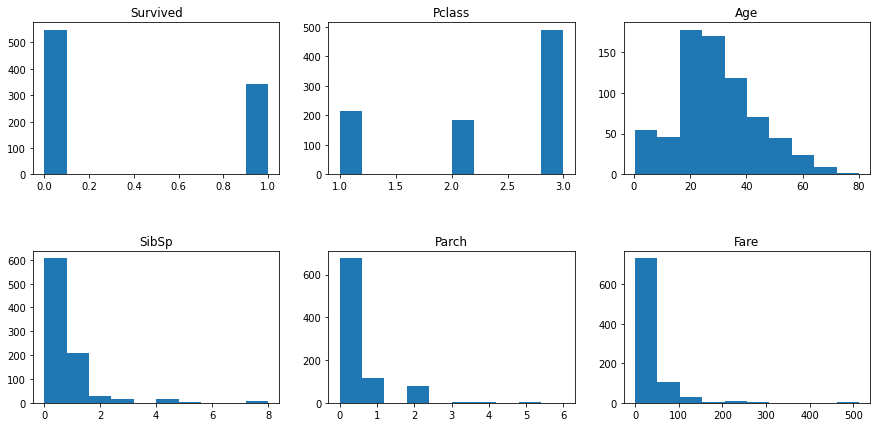

In [5]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numeric_features):
    ax = plt.subplot(2, 3, i + 1)  # 2 rows, 3 cols, index=i+1
    plt.hist(training_data[feature])
    plt.title(feature)

plt.show()

# Features<a id='features_description'></a>

## Sex<a id="features_sex">

<AxesSubplot:xlabel='Sex', ylabel='Count'>

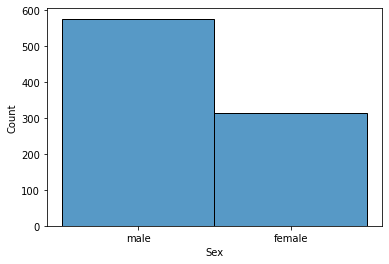

In [6]:
sns.histplot(training_data['Sex'])

<AxesSubplot:xlabel='Sex'>

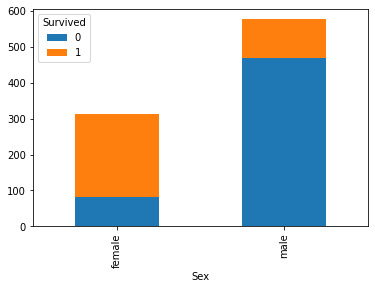

In [7]:
training_data.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)

## Age<a id="features_age">

#### Distribution of ages:

Age mode:  24.0
Age mean:  29.69911764705882
Age median:  28.0 




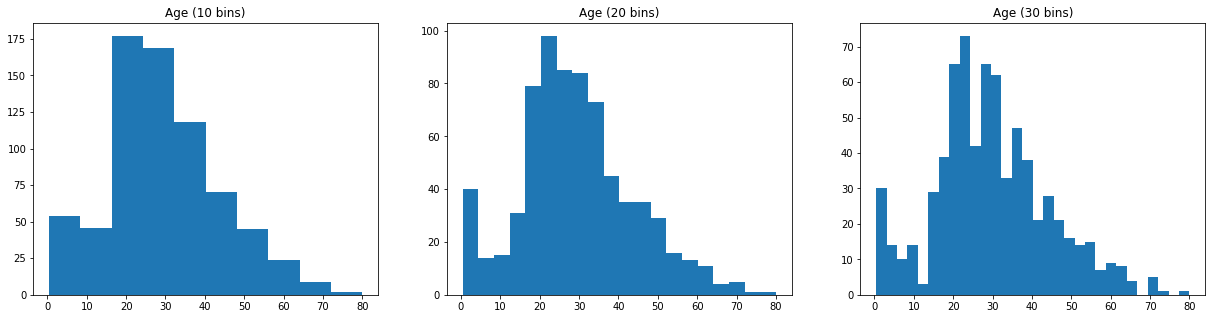

In [8]:
age_mode = training_data['Age'].mode()[0]
age_mean = training_data['Age'].mean() 
age_median = training_data['Age'].median()

print('Age mode: ', age_mode)
print('Age mean: ', age_mean)
print('Age median: ', age_median, '\n\n')


def plot_histograms(data, bins=[10, 20, 30], title=''):
    fig, axs = plt.subplots(nrows=1, ncols=len(bins), figsize=(21, 5))

    for i in range(len(bins)):
        ax = plt.subplot(1,len(bins),i+1)
        plt.hist(data, bins=bins[i])
        plt.title(title + f' ({bins[i]} bins)')

plot_histograms(training_data['Age'], title='Age')
plt.show()

In [9]:
sp.stats.normaltest(training_data['Age'], nan_policy='omit')

NormaltestResult(statistic=18.10503295208976, pvalue=0.00011709599657350744)

Age is not normally distributed.

But it can be normalized:

NormaltestResult(statistic=0.09033920687640976, pvalue=0.9558353551222782) 




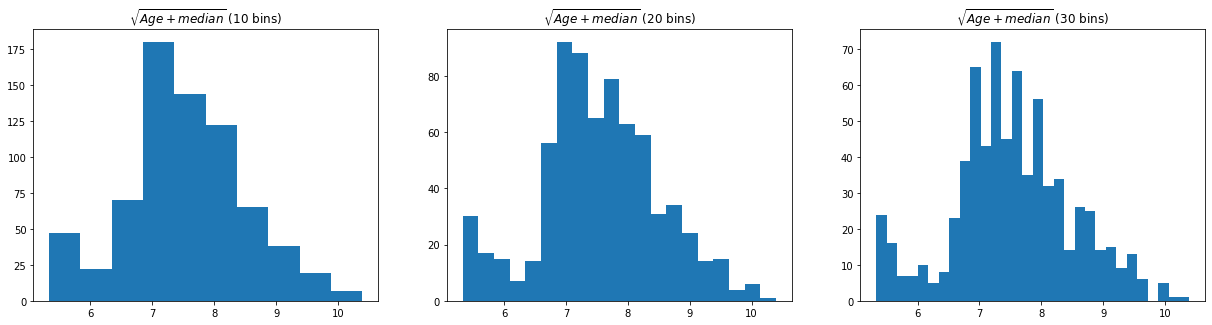

In [10]:
sqrtAge = np.sqrt(training_data['Age'] + age_median)
print(sp.stats.normaltest(sqrtAge, nan_policy='omit'), '\n\n')

plot_histograms(sqrtAge, title=r'$\sqrt{Age + median}$')
plt.show()

#### Survival by age

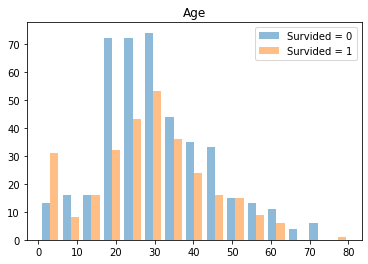

In [11]:
plt.hist([training_data['Age'][training_data['Survived']==0],
         training_data['Age'][training_data['Survived']==1]],
         bins=15, alpha=0.5, label = ['Survided = 0', 'Survided = 1'])
plt.title('Age')
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

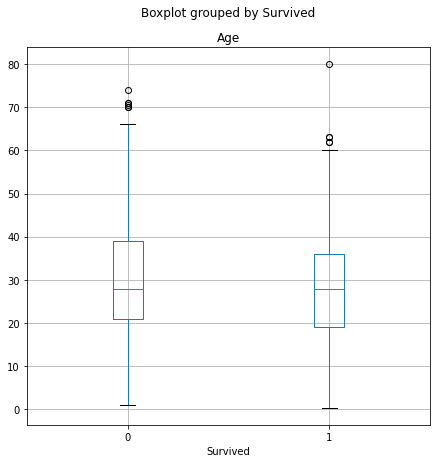

In [12]:
training_data.boxplot(column='Age',by='Survived',figsize=(7,7))

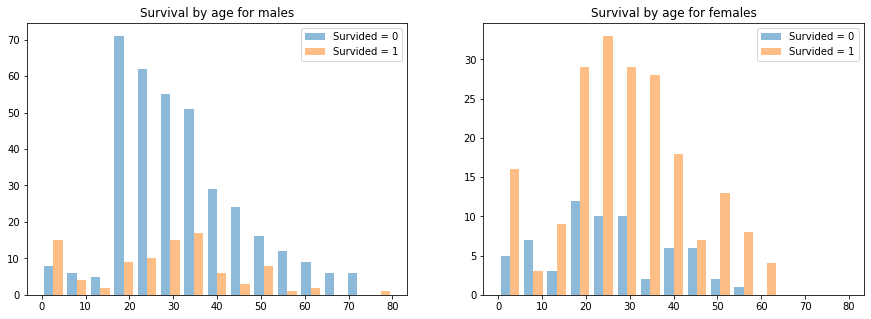

In [13]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.5)

plt.subplot(1, 2, 1)
plt.hist([training_data['Age'][(training_data['Sex']=='male') & (training_data['Survived']==0)],
         training_data['Age'][(training_data['Sex']=='male') & (training_data['Survived']==1)]],
         bins=15, alpha=0.5, range=[0, 80], label = ['Survided = 0', 'Survided = 1'])
plt.title('Survival by age for males')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.hist([training_data['Age'][(training_data['Sex']=='female') & (training_data['Survived']==0)],
         training_data['Age'][(training_data['Sex']=='female') & (training_data['Survived']==1)]],
         bins=15, alpha=0.5, range=[0, 80], label = ['Survided = 0', 'Survided = 1'])
plt.title('Survival by age for females')
plt.legend(loc='upper right')

plt.show()

#### How many babies on board?

In [14]:
training_data[training_data['Age']<1].count()

PassengerId    7
Survived       7
Pclass         7
Name           7
Sex            7
Age            7
SibSp          7
Parch          7
Ticket         7
Fare           7
Cabin          1
Embarked       7
dtype: int64

#### Are there many "estimated" ages?

Estimated ages are expresed as xx.5. Only 18 passenger had their age estimated:

In [15]:
(training_data[training_data['Age'].map(float.is_integer)==False]['Age'].dropna()>1).sum()

18

## Family<a id="features_SibSp_Parch">

Siblings + Spouses:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Parents + Children:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Passengeers with family on board: 354




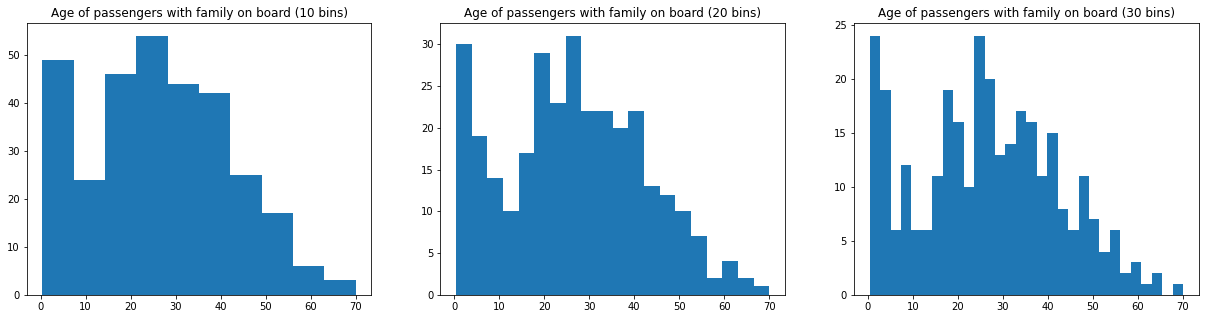

In [16]:
print('Siblings + Spouses:\n', training_data['SibSp'].value_counts(), '\n\n', sep='')
print('Parents + Children:\n', training_data['Parch'].value_counts(), sep='')

print('\n\nPassengeers with family on board: ', training_data[(training_data['SibSp'] > 0) | (training_data['Parch'] > 0)].shape[0], '\n\n', sep='')

plot_histograms(training_data[(training_data['SibSp'] > 0) | (training_data['Parch'] > 0)]['Age'], title='Age of passengers with family on board')
plt.show()

## Cabin<a id="features_cabin">

In [17]:
print(training_data['Cabin'].unique(),'\n')
print('number of unique values: ', np.size(training_data['Cabin'].unique()),'\n')
print('max number of counts per unique value: ', training_data['Cabin'].value_counts().max(), '\n\n')

deck = training_data['Cabin'].str[0]
print('Counts per deck:\n', deck.value_counts(), sep='')

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148'] 

number of unique values:  148 

max numbe

204 non-null/891 total, of which 147 are unique values with no obvious order.  

"Cabin" has many null values and is unreliable:  
Cabin info wasn't properly recorded, and passengers frecuently changed cabins once on board to be close to friends and relatives.  
In many cases info about cabins comes from survivors' memories.  

Seems like I could drop this variable.  

_Distribution of ticket classes:_ (based on https://www.encyclopedia-titanica.org/titanic-deckplans/) 
&nbsp;  

<u>Cabins:</u>
+ Deck A: 1st class, cabins in the middle front of the ship.
+ Deck B: 1st class, cabins in the front and laterals.
+ Deck C: 1st class, cabins in the front and laterals.
+ Deck D: 1st class in the front, 2nd class in the rear.
+ Deck E: 3rd class in front and rear, 2nd class in the middle rear, 1st in the laterals.
+ Deck F: 3rd class in front and rear, 2nd class in the middle rear, 1st in the laterals.
+ Deck G: 3rd class front and rear.
&nbsp;

[//]: # "![Titanic.png](attachment:db886a27-53d0-4f9e-a2f7-16685de55f0b.png)" 
&nbsp;  
Amenities are a bit all over the place, specially in the middle and rear part of the ship.  
&nbsp;  
Cabin deck could be extracted from "Cabin" feature, but appart from being incomplete, it seems to be unreliable.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

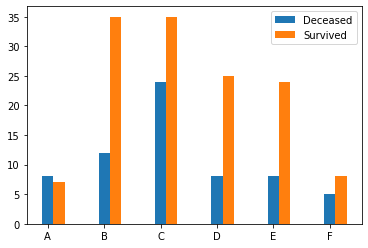

In [18]:
data_decks = training_data.copy()
data_decks['Deck'] = data_decks['Cabin'].str[0]
# print(data_decks.head(),'\n\n\n')
display(data_decks.head())

x = np.arange(data_decks['Deck'].value_counts().shape[0])
decks = data_decks['Deck'].unique()[1:]
decks.sort()

survived = np.array(data_decks[data_decks['Survived'] == 1].groupby('Deck').count()['PassengerId'])
deceased = np.array(data_decks[data_decks['Survived'] == 0].groupby('Deck').count()['PassengerId'])
x = x[:6]
survived = survived[:6]
deceased = deceased[:6]
decks = decks[:6]

plt.bar(x, width=0.2, height=deceased, label='Deceased')
plt.bar(x+0.2, width=0.2, height=survived, label='Survived')
plt.legend(loc='upper right')
plt.xticks(x, decks)
plt.show

Two groups of decks: A and F with similar survival/decease, vs. B-C-D-E where Survival > Decease.  
However A and F have low number of data points each, and really low togheher (<30) in comparisson with the full database.  

So, taking into account:
+ Low number of items (many null values)
+ Unreliability of data
+ Lack of obvious way of imputing lost values  

It seems better to drop the 'Cabin' feature.

#### Data Leakage?<a id='data_leakage'></a>

Cabin data comes mainly from two sources:  
The *Cave List*, with mainly (but not only) first class passengers,  
and accounts by survivors (https://www.encyclopedia-titanica.org/cabins.html).  

This database likely includes survivors' accounts and that would ammount to data collected after the fact.

&nbsp;

For example (see next code cell):

Mr Andrews' name does appear on the Cave List, but no cabin allocation is given. However, his bedroom steward Etches survived to confirm Andrews' stateroom number.  

Miss Crosby is not mentioned on the Cave List. Mrs Crosby\'s affidavit incliudes the following: "she and her husband occupied stateroom No. 22 and her daughter occupied stateroom No. 26, they being first-class passengers on said steamer"

<a href="https://www.encyclopedia-titanica.org/cabins.html">(from https://www.encyclopedia-titanica.org/cabins.html)</a>

In [19]:
display(training_data[training_data['Name'].str.contains('Andrews')])
print('\n\n')
display(training_data[training_data['Name'].str.contains('Crosby')])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


Survival rate changes drastically when Cabin data is available:

In [20]:
x_ = training_data[['Survived','Cabin']].copy()

x_['HasCabin'] = x_['Cabin'].notnull()

print('Mean survival: ', np.mean(x_['Survived']))
print('\nMean survival based on Cabin info: ',)
display(x_.pivot_table(values='Survived', columns='HasCabin', aggfunc=np.mean))

del(x_)

Mean survival:  0.3838383838383838

Mean survival based on Cabin info: 


HasCabin,False,True
Survived,0.299854,0.666667


## Fare<a id="features_fare">

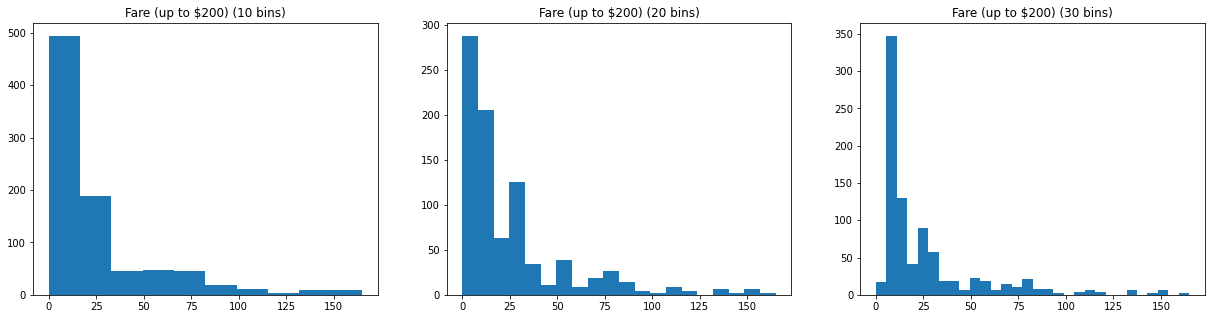

# of Tickets with fare >200$:  20


In [21]:
plot_histograms(training_data['Fare'][training_data['Fare'] <= 200], title='Fare (up to $200)') # up to 200 to increase detail in that range
plt.show()

print('# of Tickets with fare >200$: ', len(training_data[training_data['Fare'] > 200]))

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

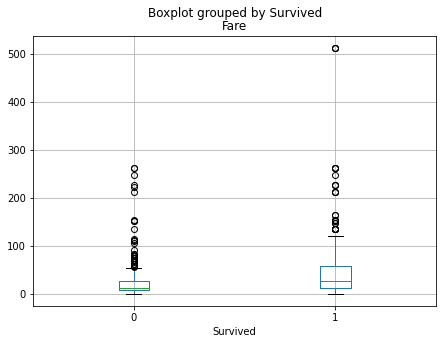

In [22]:
training_data.boxplot(column='Fare',by='Survived',figsize=(7,5))

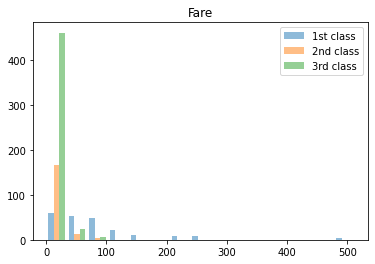

In [23]:
plt.hist([training_data['Fare'][training_data['Pclass']==1],
          training_data['Fare'][training_data['Pclass']==2],
          training_data['Fare'][training_data['Pclass']==3]],
          bins=15, alpha=0.5, label = ['1st class', '2nd class', '3rd class'])
plt.title('Fare')
plt.legend(loc='upper right')
plt.show()

In [24]:
# Playground for normalizing the Fare feature

# None of these normalizes the fare (but there's no need...)

# logFare = np.log(training_data['Fare']+1)
# print(sp.stats.normaltest(logFare, nan_policy='omit'))
# plt.hist(logFare, bins=15)
# plt.title('logFare')
# plt.show()


# logFare = np.log(training_data['Fare'][training_data['Fare']>10]-10)
# print(sp.stats.normaltest(logFare, nan_policy='omit'))
# plt.hist(logFare, bins=15)
# plt.title('logFare (omitting fare < 10)')
# plt.show()

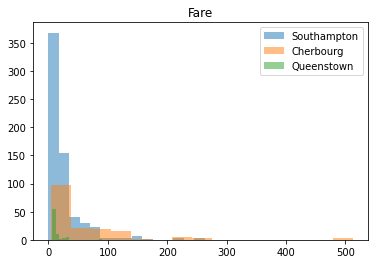

In [25]:
plt.hist(training_data['Fare'][training_data['Embarked'] == 'S'], bins=15, alpha=0.5, label='Southampton')
plt.hist(training_data['Fare'][training_data['Embarked'] == 'C'], bins=15, alpha=0.5, label='Cherbourg')
plt.hist(training_data['Fare'][training_data['Embarked'] == 'Q'], bins=15, alpha=0.5, label='Queenstown')
plt.title('Fare')
plt.legend(loc='upper right')
plt.show()

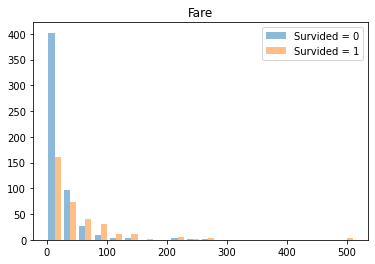

In [26]:
plt.hist([training_data['Fare'][training_data['Survived']==0],
         training_data['Fare'][training_data['Survived']==1]],
         bins=20,  alpha=0.5, label = ['Survided = 0', 'Survided = 1'])
plt.title('Fare')
plt.legend(loc='upper right')
plt.show()

As expected(?) passengers who paid more had better chances of survival.

Most passengers with expensive tickets boraded in Cherbourg.

## Embarked<a id="features_embarked">

<AxesSubplot:xlabel='Embarked', ylabel='count'>

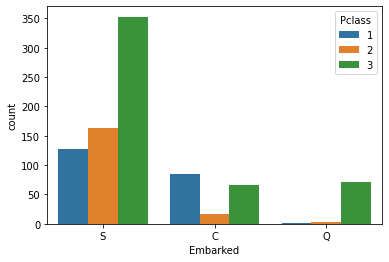

In [27]:
sns.countplot(data=X, x='Embarked', hue='Pclass')

## Ticket<a id="features_ticket">

In [28]:
print(np.shape(training_data['Ticket'].unique()))
print(sorted(training_data['Ticket'].unique()))
print(training_data['Ticket'].value_counts()[training_data['Ticket'].value_counts() > 1].count())

(681,)
['110152', '110413', '110465', '110564', '110813', '111240', '111320', '111361', '111369', '111426', '111427', '111428', '112050', '112052', '112053', '112058', '112059', '112277', '112379', '113028', '113043', '113050', '113051', '113055', '113056', '113059', '113501', '113503', '113505', '113509', '113510', '113514', '113572', '113760', '113767', '113773', '113776', '113781', '113783', '113784', '113786', '113787', '113788', '113789', '113792', '113794', '113796', '113798', '113800', '113803', '113804', '113806', '113807', '11668', '11751', '11752', '11753', '11755', '11765', '11767', '11769', '11771', '11774', '11813', '11967', '12233', '12460', '12749', '13049', '13213', '13214', '13502', '13507', '13509', '13567', '13568', '14311', '14312', '14313', '14973', '1601', '16966', '16988', '17421', '17453', '17463', '17464', '17465', '17466', '17474', '17764', '19877', '19928', '19943', '19947', '19950', '19952', '19972', '19988', '19996', '2003', '211536', '21440', '218629', '21

Doesn't look like there's anything interesting here.  
Good candidate for dropping.  
  
However, looking at which tickets are being shared by many passengers may give info about family/friends,  
under the assumption that people with same tickets bought the passage toghether.

## Association between features

### Correlation<a id="features_correlation">

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


<AxesSubplot:>

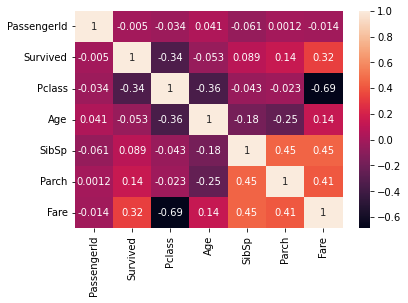

In [29]:
correlations = training_data.corr(method='spearman')
display(correlations)
sns.heatmap(correlations, annot=True)

### Mutual Information

In [30]:
from sklearn.feature_selection import mutual_info_classif

x_ = X.copy()
x_ = x_.drop('Cabin', axis=1)
x_ = x_.drop('Name', axis=1)
x_['Age'] = x_['Age'].fillna(x_['Age'].median())

# Label encoding for categoricals
for colname in x_.select_dtypes("object"):
    x_[colname], _ = x_[colname].factorize()

# Check all discrete features have integer dtypes
discrete_features = x_.dtypes == int
print(discrete_features)

PassengerId     True
Pclass          True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare           False
Embarked        True
dtype: bool


PassengerId    0.665912
Ticket         0.572496
Fare           0.157460
Sex            0.150870
Pclass         0.058107
SibSp          0.023197
Age            0.023035
Embarked       0.016668
Parch          0.016366
Name: MutualInfo, dtype: float64


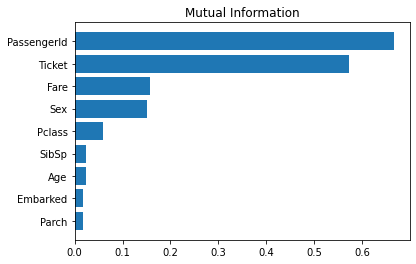

In [31]:
def get_mutual_info(x, y, discrete_features):
    mutual_info = mutual_info_classif(x, y, discrete_features=discrete_features)
    return pd.Series(mutual_info, name="MutualInfo", index=x.columns).sort_values(ascending=False)

def plot_mi_scores(mutual_inf):
    mutual_inf = mutual_inf.sort_values(ascending=True)
    scale = np.arange(len(mutual_inf))
    plt.barh(y=scale, width=mutual_inf)
    plt.yticks(scale, labels=list(mutual_inf.index))
    plt.title("Mutual Information")

mut_info = get_mutual_info(x_, y, discrete_features)
print(mut_info)

plt.figure()
plot_mi_scores(mut_info)

Mutual information is high for `PassengerID` and `Ticket`. `Ticket`, because is factorized and few passengers share the same Ticket, should be practically working as an index, the same as `PassengerID`.

I wonder if this could be an artifact of having discrete values that unequivocally identify the target, or whether data has some intrinsic order that could leak the target.

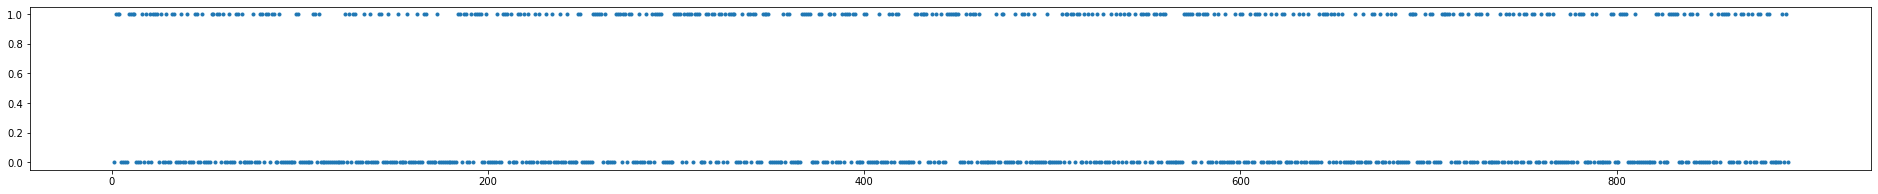

In [32]:
plt.figure(figsize=(33,3))
plt.scatter(data=training_data, x='PassengerId', y='Survived', marker='.')
plt.show()

PassengerId     True
Pclass          True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare           False
Embarked        True
randoms_int     True
dtype: bool
PassengerId    0.665912
randoms_int    0.665912
Ticket         0.572496
Sex            0.150870
Fare           0.124840
Pclass         0.058107
Age            0.028412
SibSp          0.023197
Embarked       0.016668
Parch          0.016366
Name: MutualInfo, dtype: float64


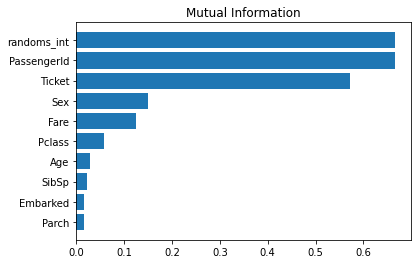

In [33]:
x_['randoms_int'] = np.random.permutation(len(x_))

discrete_features = x_.dtypes == int
print(discrete_features)

mut_info = get_mutual_info(x_, y, discrete_features)
print(mut_info)

plt.figure()
plot_mi_scores(mut_info)

It seems that the high MI values were related to having non-repeating integer variables since a randomly assigned integers can reproduce the scores.

In [34]:
del x_

`Fare` and `Sex` seem to be good indicators of survival.

`Pclass` is also a good indicator. It shoudl be consider however it's strong negative correlation with `Fare`.

The presence or absence of `Cabin` information is also a powerful predictor of the target variable, but it must be considered as data leakage.  
While there seems to be value in knowing in which Deck a passenger traveled, it should be considered that this can also be an effect of leackage:  
For example, it could be that passengers in Deck A (with similar rates of survivals and deaths) are more likely to talk about their fellow pasengers than passengers from Deck B (where survival rate is greater).

## Feature Engineering<a id="feature_engineering">

Eliminate first the Passenger ID, because for sure is of no use.

In [35]:
X = X.drop('PassengerId', axis=1)

## Name - Honorifics<a id="featureEng_honor">

The `Name` feature include a honorific title that could be useful for OHE.

It would likely convey similar, but more detailed information than `Sex`.

In [36]:
honorif = X['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
print(honorif.value_counts())
print('\nnull values: ', honorif.isnull().sum())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

null values:  0


Jonkheer: Squire (Netherlands)

In [37]:
factorized_honorif, _ = honorif.factorize()
factorized_honorif = pd.DataFrame(factorized_honorif)
mut_info = get_mutual_info(factorized_honorif, y, discrete_features=True)
print(mut_info[0])

factorized_sex, _ = training_data['Sex'].factorize()
mut_info = get_mutual_info(factorized_honorif, factorized_sex, discrete_features=True)
print('MI Honorific vs. Sex: ', mut_info[0])

0.17804567702009755
MI Honorific vs. Sex:  0.6457055951718372


In [38]:
honorif_test = test_data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
print(honorif_test.value_counts())
print('\nnull values: ', honorif_test.isnull().sum())

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

null values:  0


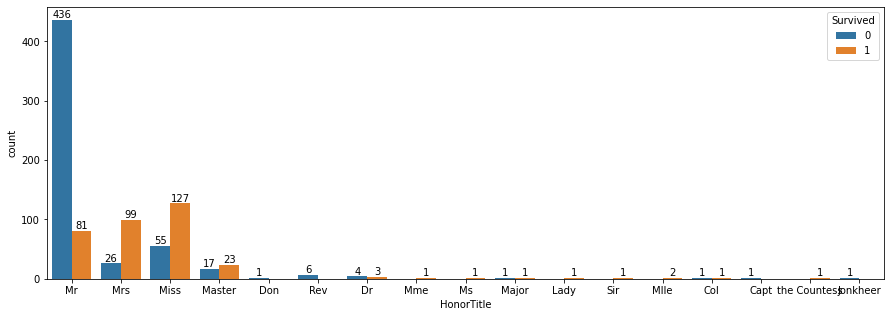

In [39]:
x_ = training_data.copy()
x_['HonorTitle'] = honorif

plt.figure(figsize=(15,5))
ax = sns.countplot(data=x_, x='HonorTitle', hue='Survived')
for container in ax.containers:  # Display counts (https://stackoverflow.com/a/68334380/15032126)
    ax.bar_label(container)
plt.show()

As expected the honorific has a higher mutual information score against the target than `Sex`. We need to be careful however, since there's a lot of values that appear only once or twice, and therefore are bound to hold lot of information about the target.

When choosing whether to use the honorific, `Sex`, or both it whould be taken into account that there's a lot of redundancy between both features.  
Also, there are some honorifics that appear only once, many that don't appear on the test set, and there's one honorific in the test set (`Dona`) that is not present in the training set.
These are either nobility titles or high ranks in the army. Therefore, it should be considered whether to have a single default category for all of them.

In [40]:
X = X.drop('Name', axis=1)
X['HonorTitle'] = honorif

In [41]:
from sklearn.preprocessing import OneHotEncoder

honor_enc = OneHotEncoder(handle_unknown='ignore')  # 'Dona' is in the test set but not in the training set
honor_enc.fit(X[['HonorTitle']].to_numpy())

endoded_honorif = honor_enc.transform(X[['HonorTitle']].to_numpy()).toarray()
enc_feature_names = honor_enc.get_feature_names_out(['HonorTitle'])


X = X.drop('HonorTitle', axis=1)
X = pd.concat([X, pd.DataFrame(endoded_honorif, columns=enc_feature_names).astype(int)], axis=1)
display(X.head())

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HonorTitle_Capt,...,HonorTitle_Master,HonorTitle_Miss,HonorTitle_Mlle,HonorTitle_Mme,HonorTitle_Mr,HonorTitle_Mrs,HonorTitle_Ms,HonorTitle_Rev,HonorTitle_Sir,HonorTitle_the Countess
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,...,0,0,0,0,1,0,0,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,...,0,0,0,0,0,1,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,...,0,1,0,0,0,0,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,...,0,0,0,0,0,1,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,...,0,0,0,0,1,0,0,0,0,0


Some categories are uncommon, appearing one or few times, wich could lead to overfitting, specially when using models that can try to exploit unfrequent categories, like trees.
However, after some initial experiments (not shown here), I found that setting `categories=honor_categories` with either

+ `honor_categories = [['Mr', 'Mrs', 'Miss', 'Master']]`
+ `honor_categories = [['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr']]`

would produce no enhancement with logistic regression a slightly overfitting with KNN and a _reduction_ in performance for Random Forest.

## How many passengers share the same ticket?<a id="featureEng_Share_ticket">

In [42]:
full_data = pd.concat([training_data, test_data],join='inner')
print(training_data.shape)
print(test_data.shape)
print(full_data.shape)

# Number of passengers that share the ticket with at least one more passenger:
print(full_data['Ticket'].value_counts()[full_data['Ticket'].value_counts() > 1].count())

ticket_counts = pd.Series.to_dict(full_data['Ticket'].value_counts()-1) # Subtract 1 => how many "other" passengers share that ticket
full_data['ShareTicket'] = full_data['Ticket'].map(lambda p: ticket_counts[p])
full_data.head()

(891, 12)
(418, 11)
(1309, 11)
216


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ShareTicket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [43]:
print(full_data['ShareTicket'].iloc[0:891].value_counts())

mut_info = get_mutual_info(full_data[['ShareTicket']].iloc[0:891], y, discrete_features=True)
print('MI ShareTicket vs. Target: ', mut_info[0])

0     481
1     181
2     101
3      44
6      24
4      21
5      19
7      13
10      7
Name: ShareTicket, dtype: int64
MI ShareTicket vs. Target:  0.058604941519912565


<AxesSubplot:xlabel='Embarked', ylabel='count'>

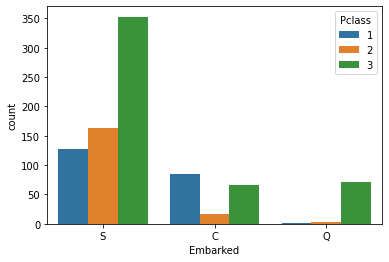

In [44]:
sns.countplot(data=X, x='Embarked', hue='Pclass')

How many other passengers share the same ticket doesn't seem to be an awesome feature, but is still not too bad, with MI scores similar to `PClass`.

In [45]:
X = X.drop('Ticket', axis=1)

X['ShareTicket'] = full_data['ShareTicket'].iloc[0:891]  # Cannot use merge because of duplicated indexes

display(x_)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HonorTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


## Cabin<a id="featureEng_Cabin">

As discused [previously](#features_cabin), `Cabin` contains leaked data.
Therefore, it should be discarded for a real-life analysis scenario. But because this is a Kaggle competition, our goal is to score high and not necessarily to generate _the best_ model. Using a leaked feature can give us an advantage.

The dataset contains only one passenger in the Boat Deck (`T`). And there's no one in deck T in the test set. So it seems reasonable to drop it and let Deck T to be represented by 0s in the whole row.

In [46]:
X['Cabin'] = X['Cabin'].str[0]

X = pd.get_dummies(X, prefix='Cabin', dummy_na=True, columns=['Cabin'])
X = X.drop('Cabin_T', axis=1)

display(X)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HonorTitle_Capt,HonorTitle_Col,HonorTitle_Don,...,HonorTitle_the Countess,ShareTicket,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_nan
0,3,male,22.0,1,0,7.2500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,71.2833,C,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,female,26.0,0,0,7.9250,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,male,35.0,0,0,8.0500,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,female,19.0,0,0,30.0000,S,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,3,female,NaN,1,2,23.4500,S,0,0,0,...,0,3,0,0,0,0,0,0,0,1
889,1,male,26.0,0,0,30.0000,C,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Family<a id="featureEng_Family">

`SibSp` and `Parch` don't look like interesting features by themselves. But maybe they can be combined to get the total number of relatives on board.

In [47]:
X['Family'] = X['SibSp'] + X['Parch']
mut_info = get_mutual_info(X[['Family']], y, discrete_features=True)
print(mut_info[0])

0.04778124144601986


MI scores of total number of relatives vs. the target are higher (about double) than either `SibSp` or `Parch` alone.

## Age<a id="featureEng_Age">

Data about age of passengers is incomplete, lacking around 20% of the data. It could be reasonable to impute the missing values.

In [48]:
X['Age'] = X['Age'].fillna(age_median)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   891 non-null    int64  
 1   Sex                      891 non-null    object 
 2   Age                      891 non-null    float64
 3   SibSp                    891 non-null    int64  
 4   Parch                    891 non-null    int64  
 5   Fare                     891 non-null    float64
 6   Embarked                 889 non-null    object 
 7   HonorTitle_Capt          891 non-null    int64  
 8   HonorTitle_Col           891 non-null    int64  
 9   HonorTitle_Don           891 non-null    int64  
 10  HonorTitle_Dr            891 non-null    int64  
 11  HonorTitle_Jonkheer      891 non-null    int64  
 12  HonorTitle_Lady          891 non-null    int64  
 13  HonorTitle_Major         891 non-null    int64  
 14  HonorTitle_Master        8

## Embarked<a id="featureEng_Embarked">

The order of embarkation was: Southampton (S) --> Cherbourg (C) --> Queenstown (Q)

Two rows are missing from the training set, but none from the test set.

In [49]:
X[X['Embarked'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HonorTitle_Capt,HonorTitle_Col,HonorTitle_Don,...,ShareTicket,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_nan,Family
61,1,female,38.0,0,0,80.0,NaN,0,0,0,...,1,0,1,0,0,0,0,0,0,0
829,1,female,62.0,0,0,80.0,NaN,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [50]:
display(training_data[training_data['Ticket']=='113572'])
display(training_data[training_data['Cabin']=='B28'])
display(training_data[training_data['Name'].str.contains(r'\bNelson\b')]) # See if we can find Mrs. Nelson's husband

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


The two passengers from whom we don't have `Embarked` information traveled in the same cabin with the same ticket, but neither of those were shared with other passsegers so we could estimate where did they embarked.

Both of them travel in First Class, wich [suggest](#features_embarked) that either they boarded in Southampton or in Cherbourg. However, we don't have data to decide in which one of both.

In [51]:
X = X.dropna(subset=['Embarked'])
y = y.loc[X.index]

X['Embarked'] = X['Embarked'].replace({'S':0, 'C':1, 'Q':2})

display(X)
print(y.shape)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HonorTitle_Capt,HonorTitle_Col,HonorTitle_Don,...,ShareTicket,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_nan,Family
0,3,male,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,female,38.0,1,0,71.2833,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,3,female,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,female,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,3,male,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
887,1,female,19.0,0,0,30.0000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
888,3,female,28.0,1,2,23.4500,0,0,0,0,...,3,0,0,0,0,0,0,0,1,3
889,1,male,26.0,0,0,30.0000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


(889,)


## Sex

Because is binary, we can just encode it as 0-1.

In [52]:
from sklearn.preprocessing import LabelEncoder

sex_encoder = LabelEncoder()
X['Sex'] = sex_encoder.fit_transform(X['Sex'])
print(sex_encoder.classes_)

['female' 'male']


## Add new features to testing database

Pclass                      True
Sex                         True
Age                        False
SibSp                       True
Parch                       True
Fare                       False
Embarked                    True
HonorTitle_Capt             True
HonorTitle_Col              True
HonorTitle_Don              True
HonorTitle_Dr               True
HonorTitle_Jonkheer         True
HonorTitle_Lady             True
HonorTitle_Major            True
HonorTitle_Master           True
HonorTitle_Miss             True
HonorTitle_Mlle             True
HonorTitle_Mme              True
HonorTitle_Mr               True
HonorTitle_Mrs              True
HonorTitle_Ms               True
HonorTitle_Rev              True
HonorTitle_Sir              True
HonorTitle_the Countess     True
ShareTicket                 True
Cabin_A                     True
Cabin_B                     True
Cabin_C                     True
Cabin_D                     True
Cabin_E                     True
Cabin_F   

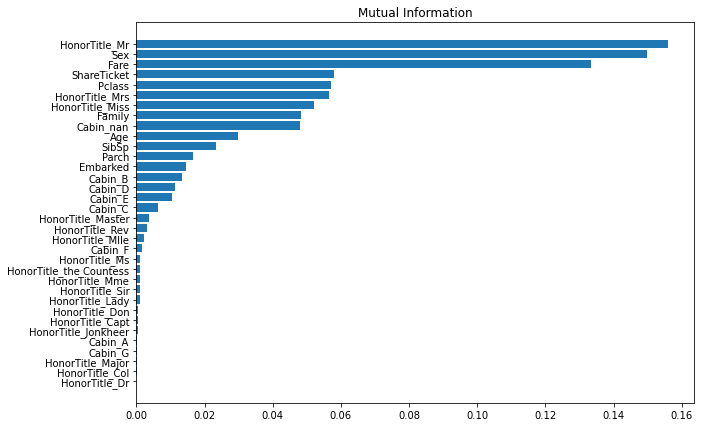

In [53]:
x_ = X.copy()

# Label encoding for categoricals
for colname in x_.select_dtypes("object"):
    x_[colname], _ = x_[colname].factorize()

# Check all discrete features have integer dtypes

# OHE features are uint8, which is not recognized as int
ohe_columns = ['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_nan'] 
for item in ohe_columns:
    x_[ohe_columns] = x_[ohe_columns].astype(int)

discrete_features = x_.dtypes == int
print(discrete_features)


mut_info = get_mutual_info(x_, y, discrete_features)
print(mut_info)


plt.figure(figsize=(10,7))
plot_mi_scores(mut_info)

del x_

## Some additional comments on Data Leakeage<a id='discussion_leakeage'>

As commented [previously](#data_leakage), most `Cabin` data was collected after the accident from survivors' affidavits, therefore being a case of data leakeage we can use in our advantage for the sake of scoring high.

Another practice used in the processing of data in this notebook would induce data leakeage in a real modeling scenario: merging training and testing databases to calculate the `ShareTicket` feature and to imput `Age` values.  
However, that **is not true** for this particular _toy database_ since we are working with the whole population, and not a sample. I.e. we are imputting the median age of all passengers, which happens to be the same as the median of the merge of our two databases.  
In a realistic scenario (you don't try to make predictions if you already know the whole population) we would have only a sample and this would be indeed a bad practice.

# Modeling<a id="models">

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# for initial baseline and model selection:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.model_selection import train_test_split
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# scaler = MinMaxScaler()
# train_X = scaler.fit_transform(train_X)
# val_X = scaler.transform(val_X)

def cv_model_evaluation(model, X, y, cv=8):
    scores = cross_validate(model, X, y, cv=cv, return_train_score=True)
    print("Train Accuracy: %0.4f,  std dev: %0.4f" % (scores['train_score'].mean(), scores['train_score'].std()))
    print(" Test Accuracy: %0.4f,  std dev: %0.4f" % (scores['test_score'].mean(), scores['test_score'].std()))

## Baseline<a id="LogReg_KNN">

In [55]:
display_markdown('#### Linear Regression:', raw=True)
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X, y)

print('-----------------')

display_markdown("#### KNN:", raw=True)
clf_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(7))
cv_model_evaluation(clf_knn, X, y)

#### Linear Regression:

Train Accuracy: 0.8401,  std dev: 0.0048
 Test Accuracy: 0.8291,  std dev: 0.0227
-----------------


#### KNN:

Train Accuracy: 0.8533,  std dev: 0.0038
 Test Accuracy: 0.8358,  std dev: 0.0362


We'll start by trying some simple models like Logistic Regression or KNN. And later move to more computationally expensive ones.


[\\]: # "Note that `MinMaxScaler` is not necessary for tree models, but won't hurt performance and it will be necessary for the simple ones."

## Feature selection - Sex<a id="model_featureSelection_sex">

In [56]:
get_mutual_info(X[[col for col in X.columns if "HonorTitle" in col]], X['Sex'], discrete_features=True)

HonorTitle_Mr              0.463165
HonorTitle_Miss            0.266614
HonorTitle_Mrs             0.168195
HonorTitle_Master          0.020018
HonorTitle_Rev             0.002930
HonorTitle_Mlle            0.002360
HonorTitle_Ms              0.001179
HonorTitle_Mme             0.001179
HonorTitle_the Countess    0.001179
HonorTitle_Lady            0.001179
HonorTitle_Col             0.000974
HonorTitle_Major           0.000974
HonorTitle_Dr              0.000872
HonorTitle_Jonkheer        0.000487
HonorTitle_Don             0.000487
HonorTitle_Sir             0.000487
HonorTitle_Capt            0.000487
Name: MutualInfo, dtype: float64

`Sex` is quite redundant with `HonorTitle`. It could be a good idea to eliminate it.

In [57]:
X_ = X.copy()
X_ = X_.drop('Sex',axis=1)

display_markdown('#### Linear Regression (Data - `Sex`):', raw=True)
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X_, y)

print('-----------------')

display_markdown('#### KNN (Data - `Sex`):', raw=True)
clf_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(7))
cv_model_evaluation(clf_knn, X_, y)

#### Linear Regression (Data - `Sex`):

Train Accuracy: 0.8385,  std dev: 0.0053
 Test Accuracy: 0.8268,  std dev: 0.0243
-----------------


#### KNN (Data - `Sex`):

Train Accuracy: 0.8539,  std dev: 0.0032
 Test Accuracy: 0.8313,  std dev: 0.0333


Dropping `'Sex'` did not increased performace in preliminar modeling. In fact, there was a slightly decrease in accuracy in both logistic regression and KNN, the later showing an increase in training accuracy, possibly reflecting overfitting. The effect is however small.

## Feature selection - Embarked<a id="model_featureSelection_embarked">

Embarked could be treated as ordinal since there's a temporal order in the ports. But it could also be one-hot-encoded.

In [58]:
X_ = X.copy()

X_['Embarked'] = X_['Embarked'].replace({0:'S', 1:'C', 2:'Q'})

X_ = pd.get_dummies(X_, prefix='Embarked', columns=['Embarked'])

display(X_)

,Pclass,Sex,Age,SibSp,Parch,Fare,HonorTitle_Capt,HonorTitle_Col,HonorTitle_Don,HonorTitle_Dr,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_nan,Family,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,3,0,28.0,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,1,3,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [59]:
display_markdown('#### Linear Regression (Data - `Embarked`):', raw=True)
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X_, y)

print('-----------------')

display_markdown('#### KNN (Data - `Embarked`):', raw=True)
clf_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(7))
cv_model_evaluation(clf_knn, X_, y)

#### Linear Regression (Data - `Embarked`):

Train Accuracy: 0.8428,  std dev: 0.0035
 Test Accuracy: 0.8302,  std dev: 0.0233
-----------------


#### KNN (Data - `Embarked`):

Train Accuracy: 0.8559,  std dev: 0.0051
 Test Accuracy: 0.8369,  std dev: 0.0362


OH-encoding the ports of embarkment –instead of factorizing them, produced an increase of about .5% in accuracy with KNN.

In [60]:
# keep the version of the data with OH-encoded 'Embarked'
X = X_.copy()

## Redundancy in data about family

We have generated a new feature `Family` that adds the values of `Parch` and `SibSp`. There's the possibility that redundancy between those features could produce overfitting. So, let's see if we gain something by eliminating some of these:

In [61]:
display_markdown('#### Linear Regression:', raw=True)
print('Without Parch:')
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X.drop('Parch',axis=1), y)
print('Without SibSp:')
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X.drop('SibSp',axis=1), y)
print('Without Parch AND SibSp:')
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X.drop(['Parch','SibSp'],axis=1), y)
print('Without Family:')
clf_linear = make_pipeline(MinMaxScaler(),LogisticRegression(random_state=0))
cv_model_evaluation(clf_linear, X.drop('Family',axis=1), y)

print('-----------------')

display_markdown('#### KNN:', raw=True)
clf_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier(7))
print('Without Parch:')
cv_model_evaluation(clf_knn, X.drop('Parch',axis=1), y)
print('Without SibSp:')
cv_model_evaluation(clf_knn, X.drop('SibSp',axis=1), y)
print('Without Parch AND SibSp:')
cv_model_evaluation(clf_knn, X.drop(['Parch','SibSp'],axis=1), y)
print('Without Family:')
cv_model_evaluation(clf_knn, X.drop('Family',axis=1), y)

#### Linear Regression:

Without Parch:
Train Accuracy: 0.8417,  std dev: 0.0040
 Test Accuracy: 0.8279,  std dev: 0.0241
Without SibSp:
Train Accuracy: 0.8424,  std dev: 0.0040
 Test Accuracy: 0.8302,  std dev: 0.0238
Without Parch AND SibSp:
Train Accuracy: 0.8427,  std dev: 0.0034
 Test Accuracy: 0.8313,  std dev: 0.0230
Without Family:
Train Accuracy: 0.8432,  std dev: 0.0032
 Test Accuracy: 0.8313,  std dev: 0.0250
-----------------


#### KNN:

Without Parch:
Train Accuracy: 0.8588,  std dev: 0.0041
 Test Accuracy: 0.8358,  std dev: 0.0345
Without SibSp:
Train Accuracy: 0.8560,  std dev: 0.0054
 Test Accuracy: 0.8347,  std dev: 0.0387
Without Parch AND SibSp:
Train Accuracy: 0.8584,  std dev: 0.0056
 Test Accuracy: 0.8346,  std dev: 0.0360
Without Family:
Train Accuracy: 0.8579,  std dev: 0.0048
 Test Accuracy: 0.8335,  std dev: 0.0355


We don't get any gain, and even there's a slight decrease in perfiormance when we eliminate `Family` or any data used to calculate it.

## Random Forest<a id="model_RForest">

In [62]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(X_, y, random_state = 0) #X_.drop('Sex',axis=1)

forest = RandomForestClassifier(n_estimators=300)
parameters = {'max_depth':[4,5,6,7,8,9,10,15],'criterion':['gini', 'entropy'], 'min_samples_split':[2,4,10,20]}

clf_forest = GridSearchCV(forest, parameters)
clf_forest.fit(X_train, y_train)

print('best score: ', clf_forest.best_score_)
print('best parameters: ', clf_forest.best_params_)

best score:  0.8468970934799686
best parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4}


## XGBoost

In [63]:
# from xgboost import XGBClassifier

# bst = XGBClassifier(n_estimators=300, objective='binary:logistic', random_state=0)
# parameters = {'max_depth':[1,2,3,4,10,15,20]}

# forest = RandomForestClassifier()
# clf_xgboost = GridSearchCV(bst, parameters)
# clf_xgboost.fit(X_train, y_train)

# print('best score: ', clf_xgboost.best_score_)
# print('best parameters: ', clf_xgboost.best_params_)

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbst = GradientBoostingClassifier(n_estimators=300)
parameters = {'max_depth':[1,2,3,4,5,10,15],'criterion':['friedman_mse', 'squared_error'], 'min_samples_split':[2,4,10,20]}

clf_gbst = GridSearchCV(gbst, parameters)
clf_gbst.fit(X_train, y_train)

print('best score: ', clf_gbst.best_score_)
print('best parameters: ', clf_gbst.best_params_)

best score:  0.8408708338009203
best parameters:  {'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_split': 4}


## KNN

In [65]:
X_train_knn, X_val_knn, y_train_knn, y_val_knn = train_test_split(X_.drop('Sex',axis=1), y, random_state = 0) # Sex didn't worked well for KNN

knn = KNeighborsClassifier()
scaler = MinMaxScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_val_knn = scaler.transform(X_val_knn)

parameters = {'n_neighbors':[3,4,5,6,7,8,9,10,15,20]}

clf_knn = GridSearchCV(knn, parameters)
clf_knn.fit(X_train_knn, y_train_knn)

print('best score: ', clf_knn.best_score_)
print('best parameters: ', clf_knn.best_params_)

best score:  0.8333632588935025
best parameters:  {'n_neighbors': 7}


In [66]:
# Repeat steps for data processing in test database
# Keep Passenger Id, as it's necessary for submission

test_data_ = test_data.copy()

test_data_ = test_data_.drop('Ticket', axis=1)

test_data_['HonorTitle'] = test_data_['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
test_data_ = test_data_.drop('Name', axis=1)
endoded_y_honorif = honor_enc.transform(test_data_[['HonorTitle']].to_numpy()).toarray()
test_data_ = test_data_.drop('HonorTitle', axis=1)
test_data_ = pd.concat([test_data_, pd.DataFrame(endoded_y_honorif, columns=enc_feature_names).astype(int)], axis=1)

test_data_['ShareTicket'] = full_data['ShareTicket'].iloc[891:]
test_data_['Cabin'] = test_data_['Cabin'].str[0]
test_data_ = pd.get_dummies(test_data_, prefix='Cabin', dummy_na=True, columns=['Cabin'])
test_data_['Family'] = test_data_['SibSp'] + test_data_['Parch']
test_data_['Age'] = test_data_['Age'].fillna(age_median)
# test_data_['Embarked'] = test_data_['Embarked'].replace({'S':0, 'C':1, 'Q':2})
test_data_['Sex'] = sex_encoder.fit_transform(test_data_['Sex'])
# test_data_['Embarked'] = test_data_['Embarked'].replace({0:'S', 1:'C', 2:'Q'})
test_data_ = pd.get_dummies(test_data_, prefix='Embarked', columns=['Embarked'])

test_data_ = test_data_.set_index('PassengerId')

display(test_data_)
print("X_train's shape: ", X.shape)
print("y_train's shape: ", y.shape)
print("X_test's shape: ", test_data_.shape)
print(test_data_.info())

,Pclass,Sex,Age,SibSp,Parch,Fare,HonorTitle_Capt,HonorTitle_Col,HonorTitle_Don,HonorTitle_Dr,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_nan,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,1,34.5,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
893,3,0,47.0,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
894,2,1,62.0,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
895,3,1,27.0,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
896,3,0,22.0,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,1,28.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1306,1,0,39.0,0,0,108.9000,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1307,3,1,38.5,0,0,7.2500,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


X_train's shape:  (889, 36)
y_train's shape:  (889,)
X_test's shape:  (418, 36)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   418 non-null    int64  
 1   Sex                      418 non-null    int64  
 2   Age                      418 non-null    float64
 3   SibSp                    418 non-null    int64  
 4   Parch                    418 non-null    int64  
 5   Fare                     417 non-null    float64
 6   HonorTitle_Capt          418 non-null    int64  
 7   HonorTitle_Col           418 non-null    int64  
 8   HonorTitle_Don           418 non-null    int64  
 9   HonorTitle_Dr            418 non-null    int64  
 10  HonorTitle_Jonkheer      418 non-null    int64  
 11  HonorTitle_Lady          418 non-null    int64  
 12  HonorTitle_Major         418 non-null    int64  
 1

We need to input missing test data about `Fare`. Because for this Kaggle competition we have a given database, there's no need to create a general inputing function but we can input by hand.

Also, we can use the whole dataset for inputing. As [already discussed](#discussion_leakeage) for the feature `Age`, while this would introduce data leakeage in a realistic scenario –that we could use to our advantage in the competition), is a valid practice in this case where we work with a population, not a sample.

In [67]:
display(test_data_[test_data_['Fare'].isna()])

,Pclass,Sex,Age,SibSp,Parch,Fare,HonorTitle_Capt,HonorTitle_Col,HonorTitle_Don,HonorTitle_Dr,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_nan,Family,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1044,3,1,60.5,0,0,NaN,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


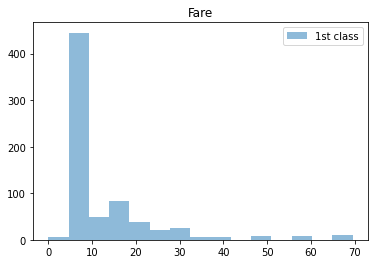

3rd class mean =  13.302888700564973
3rd class median =  8.05
3rd class mode =  8.05


In [68]:
plt.hist([full_data['Fare'][full_data['Pclass']==3]],
          bins=15, alpha=0.5, label = ['1st class', '2nd class', '3rd class'])
plt.title('Fare')
plt.legend(loc='upper right')
plt.show()

mean_3rd_class = full_data[full_data['Pclass']==3]['Fare'].mean()
median_3rd_class = full_data[full_data['Pclass']==3]['Fare'].median()
mode_3rd_class = full_data[full_data['Pclass']==3]['Fare'].mode()[0]

print('3rd class mean = ', mean_3rd_class)
print('3rd class median = ', median_3rd_class)
print('3rd class mode = ', mode_3rd_class)

In [69]:
test_data_.loc[1044, 'Fare'] = mode_3rd_class

In [70]:
# Create files for submission

forest_predictions = pd.DataFrame(clf_forest.predict(test_data_), index=test_data_.index, columns=['Survived'])
forest_predictions.to_csv('RandomForest.csv')

xgb_predictions = pd.DataFrame(clf_gbst.predict(test_data_), index=test_data_.index, columns=['Survived'])
xgb_predictions.to_csv('XGB.csv')

knn_predictions = pd.DataFrame(clf_knn.predict(scaler.transform(test_data_.drop('Sex', axis=1))), index=test_data_.index, columns=['Survived'])
knn_predictions.to_csv('KNN.csv')